In [133]:
#importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


calculate project next year salary

In [134]:
df[pd.notna(df['salary_year_avg'])]['salary_year_avg']

28        109500.0
77        140000.0
92        120000.0
100       228222.0
109        89000.0
            ...   
785624    139216.0
785641    150000.0
785648    221875.0
785682    157500.0
785692    157500.0
Name: salary_year_avg, Length: 22003, dtype: float64

In [135]:
df_salary = df[pd.notna(df['salary_year_avg'])].copy()

# apply method
def projected_salary(salary):
    return salary*1.03

df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(projected_salary)

""" 
lambda method
df_salary['salary_year_inflated'] = df_salary['salary_year_avg'].apply(lambda salary: salary*1.03)

or

df_salary['salary_year_inflated'] = df_salary['salary_year_avg']*1.03
"""


df_salary[['salary_year_avg', 'salary_year_inflated']]




,salary_year_avg,salary_year_inflated
28,109500.0,112785.00
77,140000.0,144200.00
92,120000.0,123600.00
100,228222.0,235068.66
109,89000.0,91670.00
...,...,...
785624,139216.0,143392.48
785641,150000.0,154500.00
785648,221875.0,228531.25
785682,157500.0,162225.00


In [136]:
type(df['job_skills'][1])
#df['job_skills'][0]



str

In [137]:
type(df['job_skills'][0])

NoneType

In [138]:
#string to list
df_skills_notna = df[pd.notna(df['job_skills'])].copy()
df_skills_notna.head(50)



,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
7,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Full-time,True,Romania,2023-12-07 13:40:49,False,False,Romania,None,NaN,NaN,Zitec,"['sql', 'nosql', 'gcp', 'azure', 'aws', 'bigqu...","{'cloud': ['gcp', 'azure', 'aws', 'bigquery', ..."
8,Business Analyst,Technology & Operations Business Analyst,"Copenhagen, Denmark",via Trabajo.org,Full-time,False,Denmark,2023-06-05 13:44:34,False,False,Denmark,None,NaN,NaN,Hempel,"['excel', 'powerpoint', 'power bi']","{'analyst_tools': ['excel', 'powerpoint', 'pow..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
10,Data Engineer,Erfahrene*r Data Engineer*in (m/w/d),"Basel, Switzerland",via LinkedIn,Full-time,False,Switzerland,2023-04-17 13:27:32,True,False,Switzerland,None,NaN,NaN,ROCKEN®,"['python', 'databricks', 'azure', 'spark']","{'cloud': ['databricks', 'azure'], 'libraries'..."


In [139]:
type(df_skills_notna['job_skills'][1])


#ast.literal_eval(df_skills_notna['job_skills'][1])

str

In [140]:
#df[pd.isna(df['job_skills'])]

In [141]:
'''

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)

'''
def clean_list(skill_list):
    return ast.literal_eval(skill_list)

In [142]:

df_skills_notna['job_skills'] = df_skills_notna['job_skills'].apply(clean_list)

In [143]:
df_skills_notna[['job_skills']]

,job_skills
1,"[r, python, sql, nosql, power bi, tableau]"
2,"[python, sql, c#, azure, airflow, dax, docker,..."
3,"[python, c++, java, matlab, aws, tensorflow, k..."
4,"[bash, python, oracle, aws, ansible, puppet, j..."
5,"[python, sql, gcp]"
...,...
785736,"[bash, python, perl, linux, unix, kubernetes, ..."
785737,"[sas, sas, sql, excel]"
785738,"[powerpoint, excel]"
785739,"[python, go, nosql, sql, mongo, shell, mysql, ..."


# 11_Pandas_Explode


In [144]:
# skill list -> element, enable count

df_exploded = df_skills_notna.explode('job_skills')

In [145]:
skills_count = df_exploded.groupby(['job_title_short','job_skills']).size()

In [146]:
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending=False)

In [147]:
df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [148]:
job_title = 'Data Analyst'
top_skils = 10

df_skill_final =df_skills_count[df_skills_count['job_title_short']==job_title].head(top_skils)

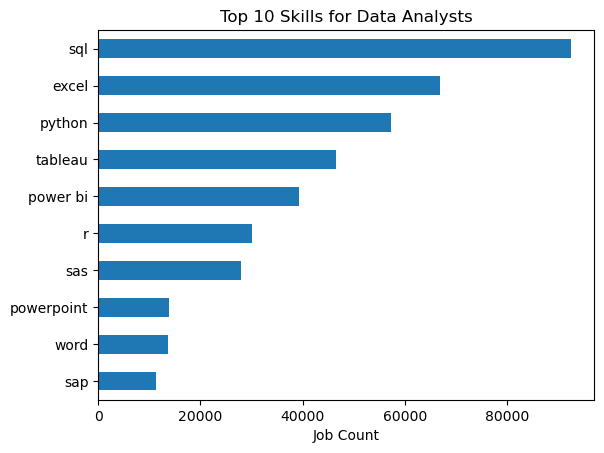

In [149]:
df_skill_final.plot(kind='barh', x = 'job_skills', y= 'skill_count')
plt.title(f'Top {top_skils} Skills for {job_title}s')
plt.ylabel("")
plt.xlabel("Job Count")
plt.legend().set_visible(False)
plt.gca().invert_yaxis()

# 12_Exercise : investigating trending skills

In [150]:
# focusing on DA job
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()

In [153]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

df_DA

df_DA_explode = df_DA.explode('job_skills')

df_DA_explode

#df_DA_pivot = df_DA_explode.pivot_table(index= 'job_posted_month_no', columns='job_skills', aggfunc= 'size', fill_value=0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"['sql', 'php', 'excel', 'power bi', 'sap', 'ji...","{'analyst_tools': ['excel', 'power bi', 'sap']...",12
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"['sql', 'python', 'r', 'redshift', 'pandas', '...","{'analyst_tools': ['excel', 'looker', 'tableau...",10
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,['sql'],{'programming': ['sql']},10
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,['sap'],{'analyst_tools': ['sap']},2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None,1
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,None,NaN,NaN,PG&E Corporation,"['sql', 'python', 'tableau']","{'analyst_tools': ['tableau'], 'programming': ...",1
785715,Data Analyst,Amul Careers 2023 - Apply Online - Data Analys...,India,melalui Jobsleworld - Jobs In India - Job Vaca...,Pekerjaan tetap,False,India,2023-03-13 06:16:28,False,False,India,None,NaN,NaN,Amul,None,None,3
785717,Data Analyst,Data & Analytics Architect (w/m/x),"Erfurt, Jerman",melalui LinkedIn,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,NTT DATA DACH,"['aws', 'azure']","{'cloud': ['aws', 'azure']}",3
